# 1.내 사진 가져오기

## 내 사진 거리 비교하기





file_list: ['sgbae1.jpg', 'sgbae2.jpg']


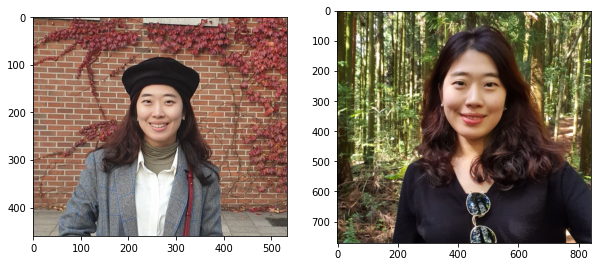

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_me'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(152, 318, 259, 211)]


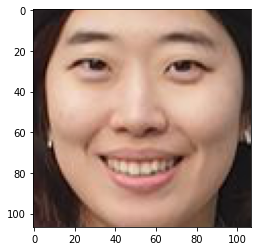

In [2]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_me/sgbae1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations) #이미지에서 얼굴 영역의 좌표를 출력

a,b,c,d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face) #이미지에서 얼굴 영역만 잘라낸 cropped_face를 그리기
#images의 디렉토리에 저장

In [3]:
#경로를 파라미터로 넘기면 얼굴 영역만 잘라서 뿌려주는 함수를 만들어 두기
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

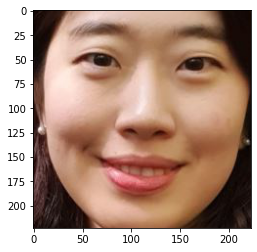

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_me/sgbae2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 임베딩만들기

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_me'
file_list = os.listdir(dir_path)

print("file_list: {}".format(file_list))

file_list: ['sgbae1.jpg', 'sgbae2.jpg']


In [6]:
#내 얼굴 영역 임베딩하기 (슬기1)
image_file = os.path.join(dir_path, 'sgbae1.jpg')
face = get_cropped_face(image_file) #얼굴영역 함수를 구하는 함수

#얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face): #face_recognition.face_encodings()으로 얼굴 임베딩 벡터 구하는 함수
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.07889518,  0.07659387,  0.09083367, -0.09828223, -0.11982343,
        -0.07633242, -0.10096918, -0.13886665,  0.08923412, -0.18024336,
         0.22734377, -0.09247801, -0.17972954, -0.07299162, -0.04981256,
         0.18836179, -0.21259373, -0.13041306, -0.00047076,  0.0181125 ,
         0.13900791,  0.01111631,  0.01415326,  0.05137829, -0.15499021,
        -0.28796008, -0.11939107, -0.06191286, -0.01169845, -0.01406762,
        -0.11693059,  0.02890986, -0.17674594, -0.0178345 ,  0.00395337,
         0.08641814,  0.001098  , -0.10856032,  0.07804763,  0.01332138,
        -0.23849298,  0.0328575 ,  0.06025374,  0.17446981,  0.19709146,
        -0.00108647,  0.01968506, -0.13539191,  0.13206419, -0.21699327,
        -0.0129037 ,  0.12237308,  0.06264628,  0.06109523,  0.03749499,
        -0.1133538 ,  0.02922097,  0.14270172, -0.09487132,  0.03047769,
         0.07801197, -0.05722618, -0.00687813, -0.12626822,  0.23580524,
         0.11336071, -0.15029079, -0.15311275,  0.1

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['sgbae2']

array([-7.32590631e-02,  5.98174036e-02,  4.92758937e-02, -9.37870517e-02,
       -1.32714033e-01, -5.44281118e-02, -1.05172560e-01, -1.57312840e-01,
        9.23821777e-02, -1.63099572e-01,  2.42349923e-01, -8.62606913e-02,
       -1.42361775e-01, -9.02043879e-02, -8.02851990e-02,  1.92667484e-01,
       -2.13461101e-01, -1.45786941e-01, -2.22623013e-02,  2.43323203e-02,
        1.25529274e-01,  1.05050178e-02,  2.52649747e-02,  6.10520765e-02,
       -1.43856764e-01, -3.25664073e-01, -1.27182052e-01, -5.43047488e-02,
       -3.45844105e-02, -7.87642971e-03, -5.99384680e-02,  3.27461362e-02,
       -1.92568079e-01, -1.88167244e-02,  1.22759147e-02,  6.74238428e-02,
       -3.30350129e-03, -1.21420071e-01,  1.09702550e-01,  1.19361244e-02,
       -2.55094469e-01,  5.18819727e-02,  7.33117908e-02,  1.89768597e-01,
        1.95157036e-01, -1.27776898e-02,  3.43230069e-02, -1.54441789e-01,
        1.34234801e-01, -1.85570881e-01, -1.17179379e-03,  1.36578605e-01,
        6.84164017e-02,  

In [9]:
#내 얼굴끼리의 차이
import numpy as np
A = np.array([-0.07889518,  0.07659387,  0.09083367, -0.09828223, -0.11982343,
        -0.07633242, -0.10096918, -0.13886665,  0.08923412, -0.18024336,
         0.22734377, -0.09247801, -0.17972954, -0.07299162, -0.04981256,
         0.18836179, -0.21259373, -0.13041306, -0.00047076,  0.0181125 ,
         0.13900791,  0.01111631,  0.01415326,  0.05137829, -0.15499021,
        -0.28796008, -0.11939107, -0.06191286, -0.01169845, -0.01406762,
        -0.11693059,  0.02890986, -0.17674594, -0.0178345 ,  0.00395337,
         0.08641814,  0.001098  , -0.10856032,  0.07804763,  0.01332138,
        -0.23849298,  0.0328575 ,  0.06025374,  0.17446981,  0.19709146,
        -0.00108647,  0.01968506, -0.13539191,  0.13206419, -0.21699327,
        -0.0129037 ,  0.12237308,  0.06264628,  0.06109523,  0.03749499,
        -0.1133538 ,  0.02922097,  0.14270172, -0.09487132,  0.03047769,
         0.07801197, -0.05722618, -0.00687813, -0.12626822,  0.23580524,
         0.11336071, -0.15029079, -0.15311275,  0.14705274, -0.09396558,
        -0.12697734,  0.04960186, -0.16560812, -0.1516044 , -0.25755981,
        -0.02060509,  0.34856653,  0.10599276, -0.20781714,  0.03298201,
        -0.090252  ,  0.04670055,  0.11703328,  0.16072056,  0.05513525,
         0.01090083, -0.10453662, -0.00364793,  0.22483151, -0.12784851,
         0.02777547,  0.26193058, -0.00345353,  0.11673388,  0.00061931,
         0.01854511, -0.1065496 ,  0.04508796, -0.11974531,  0.01303835,
         0.01569604, -0.03077854, -0.05433222,  0.13957116, -0.09407023,
         0.08180988, -0.00274539,  0.03888948,  0.02402782, -0.02004262,
        -0.06926744, -0.07509002,  0.05461313, -0.20802377,  0.17252523,
         0.17622511,  0.05451306,  0.08828364,  0.11043048,  0.07955407,
         0.00201447, -0.04114755, -0.19700038, -0.01905955,  0.10550658,
        -0.06029949, -0.0145158 , -0.02066825])

B = np.array([-7.32590631e-02,  5.98174036e-02,  4.92758937e-02, -9.37870517e-02,
       -1.32714033e-01, -5.44281118e-02, -1.05172560e-01, -1.57312840e-01,
        9.23821777e-02, -1.63099572e-01,  2.42349923e-01, -8.62606913e-02,
       -1.42361775e-01, -9.02043879e-02, -8.02851990e-02,  1.92667484e-01,
       -2.13461101e-01, -1.45786941e-01, -2.22623013e-02,  2.43323203e-02,
        1.25529274e-01,  1.05050178e-02,  2.52649747e-02,  6.10520765e-02,
       -1.43856764e-01, -3.25664073e-01, -1.27182052e-01, -5.43047488e-02,
       -3.45844105e-02, -7.87642971e-03, -5.99384680e-02,  3.27461362e-02,
       -1.92568079e-01, -1.88167244e-02,  1.22759147e-02,  6.74238428e-02,
       -3.30350129e-03, -1.21420071e-01,  1.09702550e-01,  1.19361244e-02,
       -2.55094469e-01,  5.18819727e-02,  7.33117908e-02,  1.89768597e-01,
        1.95157036e-01, -1.27776898e-02,  3.43230069e-02, -1.54441789e-01,
        1.34234801e-01, -1.85570881e-01, -1.17179379e-03,  1.36578605e-01,
        6.84164017e-02,  3.39843556e-02,  2.28848848e-02, -1.01016760e-01,
        3.75321656e-02,  1.32994086e-01, -9.28028226e-02,  1.15953060e-02,
        9.08000171e-02, -5.61298691e-02,  1.18225636e-02, -1.35139644e-01,
        2.31431291e-01,  9.97617990e-02, -1.43819094e-01, -1.62265316e-01,
        1.71860218e-01, -7.97051713e-02, -9.72263664e-02,  2.98157334e-02,
       -1.72064841e-01, -1.91959590e-01, -2.79622674e-01,  5.50331175e-03,
        3.93058896e-01,  9.39809158e-02, -2.08625719e-01,  4.40315008e-02,
       -8.63730684e-02,  5.11583239e-02,  1.02731630e-01,  1.79020077e-01,
        4.50507924e-02,  6.15681522e-04, -1.12530902e-01,  3.28617170e-05,
        2.31634393e-01, -1.09695978e-01,  7.13928323e-03,  2.61924088e-01,
       -3.64178885e-03,  7.60767907e-02,  4.04645726e-02,  4.08258289e-02,
       -1.07509971e-01,  8.07218999e-02, -1.17310144e-01,  7.12045580e-02,
       -9.04778484e-03, -4.34270278e-02, -3.61362025e-02,  1.23203099e-01,
       -6.93529099e-02,  9.24461633e-02, -1.22220041e-02,  2.88982317e-02,
        9.14840400e-03, -1.77420434e-02, -8.59877616e-02, -9.78967324e-02,
        6.40054345e-02, -2.05765530e-01,  1.67967975e-01,  1.39209062e-01,
        8.29417035e-02,  1.41548738e-01,  1.31565094e-01,  1.33967027e-01,
       -1.17526678e-02, -2.65955850e-02, -2.02318206e-01, -1.09221758e-02,
        8.45084041e-02, -4.98437397e-02,  5.16496319e-03,  9.07037966e-03])

In [10]:
#두 임베딩 벡터 간의 거리를 계산하는 함수 구현(np.linalg.norm)


def get_distance(name1,name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('sgbae1','sgbae2')


0.22772260663821842

### 내 얼굴 사이의 embedding은 0.2가 나왔다.

# 2.닮은 연예인 비교하기


- 데이터 가져오기 80개

file_list: ['HJHan.jpg', 'MYPark.jpg', 'SuhyeongHKim.jpg', 'Yusun Lee.jfif', 'DHLee.jfif', 'SRKim3.jpg', 'DasolKim.jpg', 'SeulkiKim.jpg', 'SaeronKim.jpg', 'hyoju.jpg', 'HGSong.jpg', 'MinaKang.jpg', 'SungryeongKim.jpg', 'JHSong.jpg', 'EHPark.jpg', 'YewonKim.jpg', 'SunYeongKim.jpg', 'Eunjoo Lee.jfif', 'IU.jfif', 'SHHan2.jpg', 'HJPark.jpg', 'sgbae2.jpg', 'NamjooKim.jpg', 'BYPark.jpg', 'CAHan.jpg', 'SYKim.png', 'Inhye Lee.jfif', 'Juyoung Lee.jfif', 'JJPark.jpg', 'JIYPark.jpg', 'YJSon.jpg', 'Yujin Lee.jfif', 'DaheeLee.png', 'JAPark.jpg', 'OkbinKim.jpg', 'HMPark.jpg', 'NESon.jpg', 'MiYeonLee.jfif', 'GIHan.jpg', 'YRPark.jpg', 'YASong.jpg', 'SiYPark.jpg', 'JHHan2.jpg', 'SunAhKim.jpg', 'jimin.jpg', 'ChoHee Lee.jfif', 'TYSon.jpg', 'SHPark.jpg', 'DILee.jfif', 'SJPark.png', 'SYHan.jpg', 'JHHan.jpg', 'SoeunKim.jpg', 'NYLee.jpg', 'SungKyoung Lee.jfif', 'Jin Lee.png', 'SYPark.jpg', 'YShan.jpg', 'HSPark.jpg', 'Chunga Lee.jfif', 'KaeunKim.jpg', 'JYPark.jpg', 'SungeunKim.jpg', 'SMPark.jpg', 'YoungAe Lee

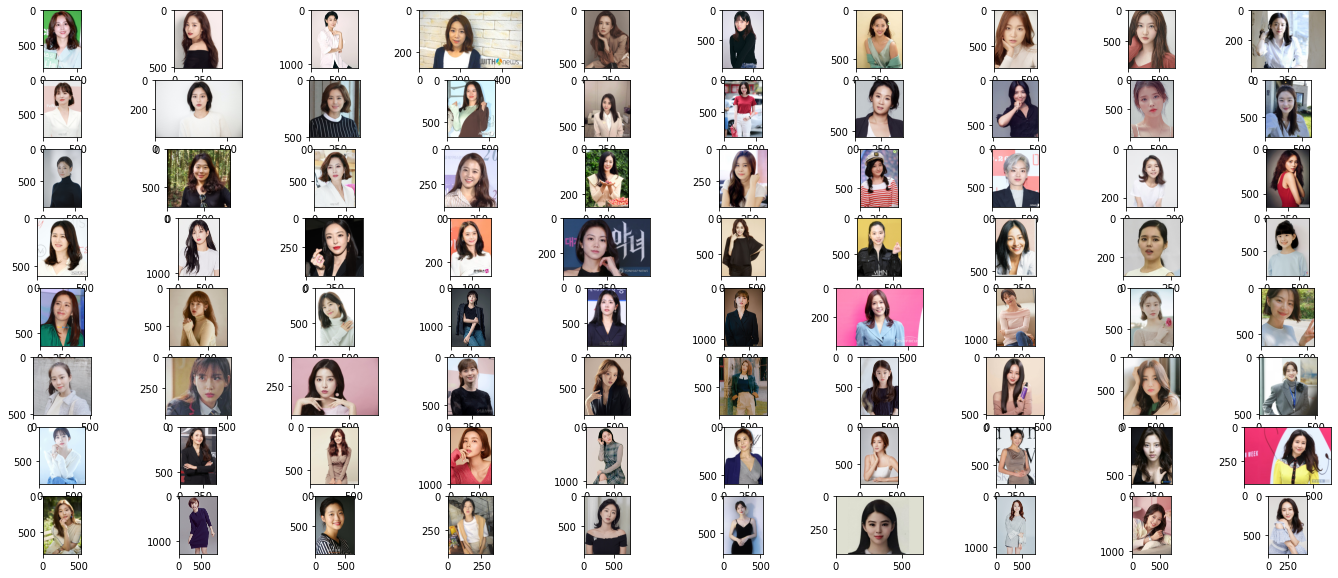

In [11]:
import face_recognition
import os
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1'
#path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/images_2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

print(len(file_list))#파일 갯수

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=8, ncols=10, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [12]:
#경로를 파라미터로 넘기면 얼굴 영역만 잘라서 뿌려주는 함수를 만들어 두기

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [13]:
image_file = os.path.join(dir_path, 'HBPark.jpg')
face = get_cropped_face(image_file) #얼굴영역 함수를 구하는 함수

#얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face): #face_recognition.face_encodings()으로 얼굴 임베딩 벡터 구하는 함수
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-4.81959991e-02,  4.68532518e-02,  2.00924333e-02, -1.08088739e-01,
        -1.13239259e-01, -3.67421731e-02, -1.02523200e-01, -1.27363458e-01,
         1.30176648e-01, -1.61714479e-01,  2.03857839e-01, -1.63413852e-01,
        -2.04111874e-01, -1.80435944e-02, -3.96450609e-02,  2.04290122e-01,
        -1.72578752e-01, -1.06813744e-01, -6.62180409e-03,  1.46486573e-02,
         1.05709501e-01,  1.53602110e-02, -6.59377547e-03,  1.20896630e-01,
        -1.35059804e-01, -2.69826800e-01, -1.23396263e-01, -5.64358458e-02,
        -3.75127420e-03, -1.03927709e-01, -6.51639178e-02,  4.15801369e-02,
        -1.26951054e-01,  2.54029594e-02,  3.19648534e-04,  1.24465674e-01,
         3.44547033e-02, -9.95383039e-02,  1.33909211e-01, -4.04899381e-03,
        -2.99130708e-01,  1.15143180e-01,  6.10660240e-02,  2.24481627e-01,
         1.56847581e-01,  7.06729479e-03, -3.13097313e-02, -2.00851664e-01,
         1.05777346e-01, -1.46289185e-01,  2.26049442e-02,  1.10877596e-01,
        -1.0

In [14]:
# 얼굴 영역을 잘라서 이미지로 저장하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            image_file = os.path.join(dir_path, file) # 경로 설정
            face = get_cropped_face(image_file) # 얼굴 영역 자르기
        except:
            os.remove(image_file) # 얼굴 영역 인식이 안되는 경우 삭제
            print(file, "삭제")

        embedding = get_face_embedding(face) # 얼굴 영역을 임베딩 벡터로 전환
        if len(embedding) > 0: # 임베딩이 0인 경우 = 비정상이기 때문에 제외
            embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 파일명에서 확장자가 제거된 상태로 이름 저장
    
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

비교하기

In [15]:
import numpy as np
def get_distance(name1,name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [16]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [48]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
   
    
    for i in range(top +1):
        if i == 0:  # 자기자신 제외
            continue
        elif sorted_faces[i][0].startswith('sgbae'): # 본인사진 두장
            continue
        elif sorted_faces[i]:
            print("순위 {}: 이름({}), 거리({})".format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
          

In [57]:
get_nearest_face('sgbae2') #나와 닯은 사람 비교

순위 1: 이름(JHHan2), 거리(0.37336419352505185)
순위 2: 이름(SHPark), 거리(0.385364509560517)
순위 3: 이름(NESon), 거리(0.3925805499862415)
순위 4: 이름(KoeunKim), 거리(0.3983124567923974)
순위 5: 이름(SRKim3), 거리(0.40724312094759973)


- 시각화하기

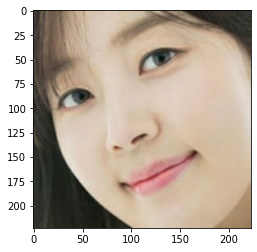

In [52]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/JHHan2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

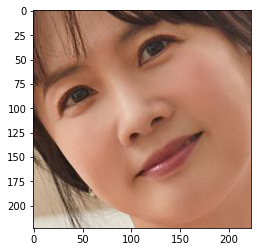

In [53]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/SHPark.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)